<a href="https://colab.research.google.com/github/AriyantGit/Data-Analysis/blob/main/AirBnb_NYC_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("Necessary packages included successfully!")

Necessary packages included successfully!


In [2]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/AB_NYC_2019.csv'
airbnb = pd.read_csv(url,error_bad_lines=False)
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df=airbnb.copy()
df.shape

(48895, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(["id","host_name","last_review"],axis=1,inplace=True)
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [9]:
df["reviews_per_month"].fillna(0,inplace=True)

In [10]:
df.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [11]:
df["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [12]:
len(df["neighbourhood"].unique())

221

In [13]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

#Top 10 Host Id

In [14]:
top_host=df["host_id"].value_counts()
top_host.head(10)

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,48895.0,1.090910e+00,1.597283e+00,0.00000,4.000000e-02,3.700000e-01,1.580000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


Text(0.5, 1.0, 'Correlation With parameters')

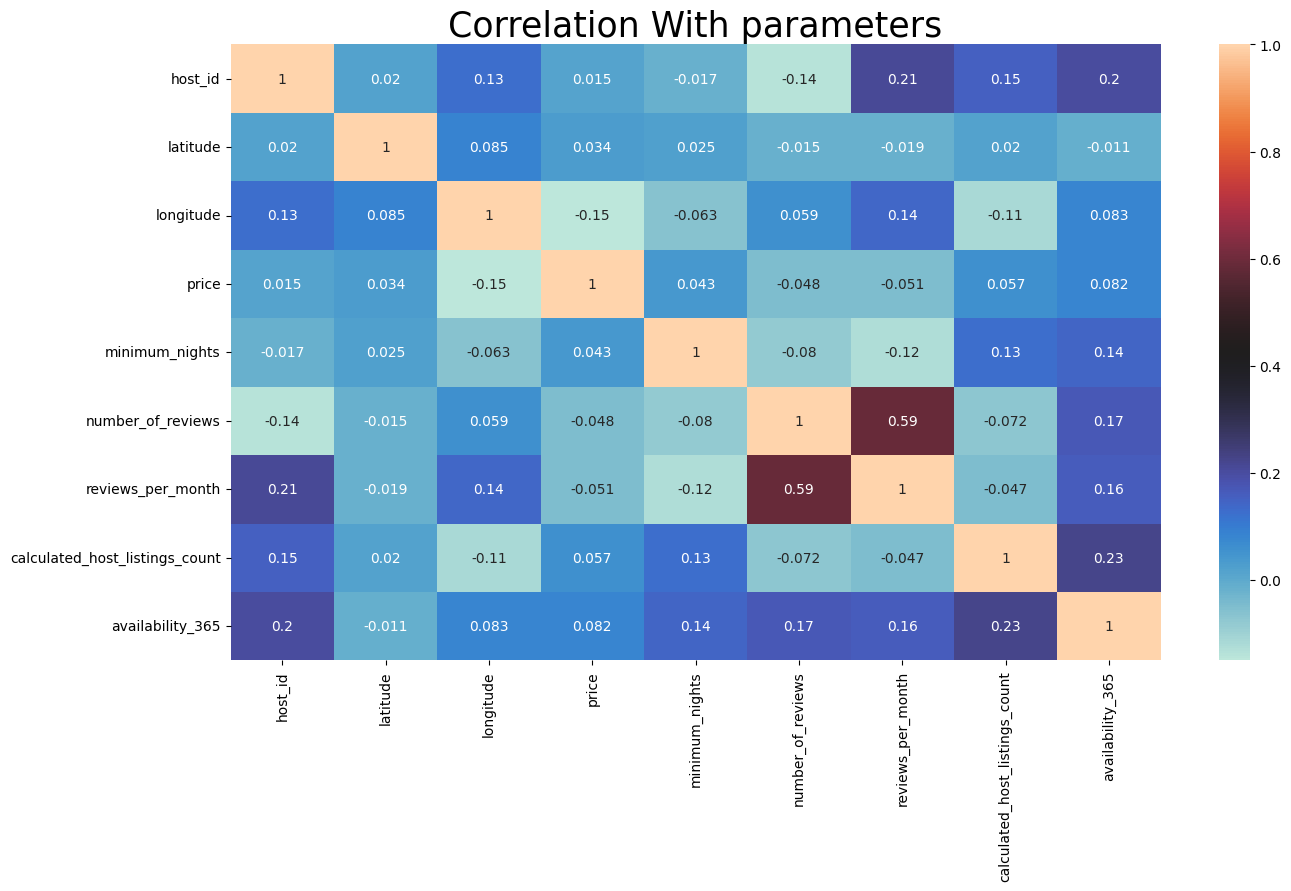

In [16]:
corr=df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap="icefire")
plt.title("Correlation With parameters",size=25)

Text(0.5, 1.0, 'Density and distribution of prices for each neighbourhood_group\n')

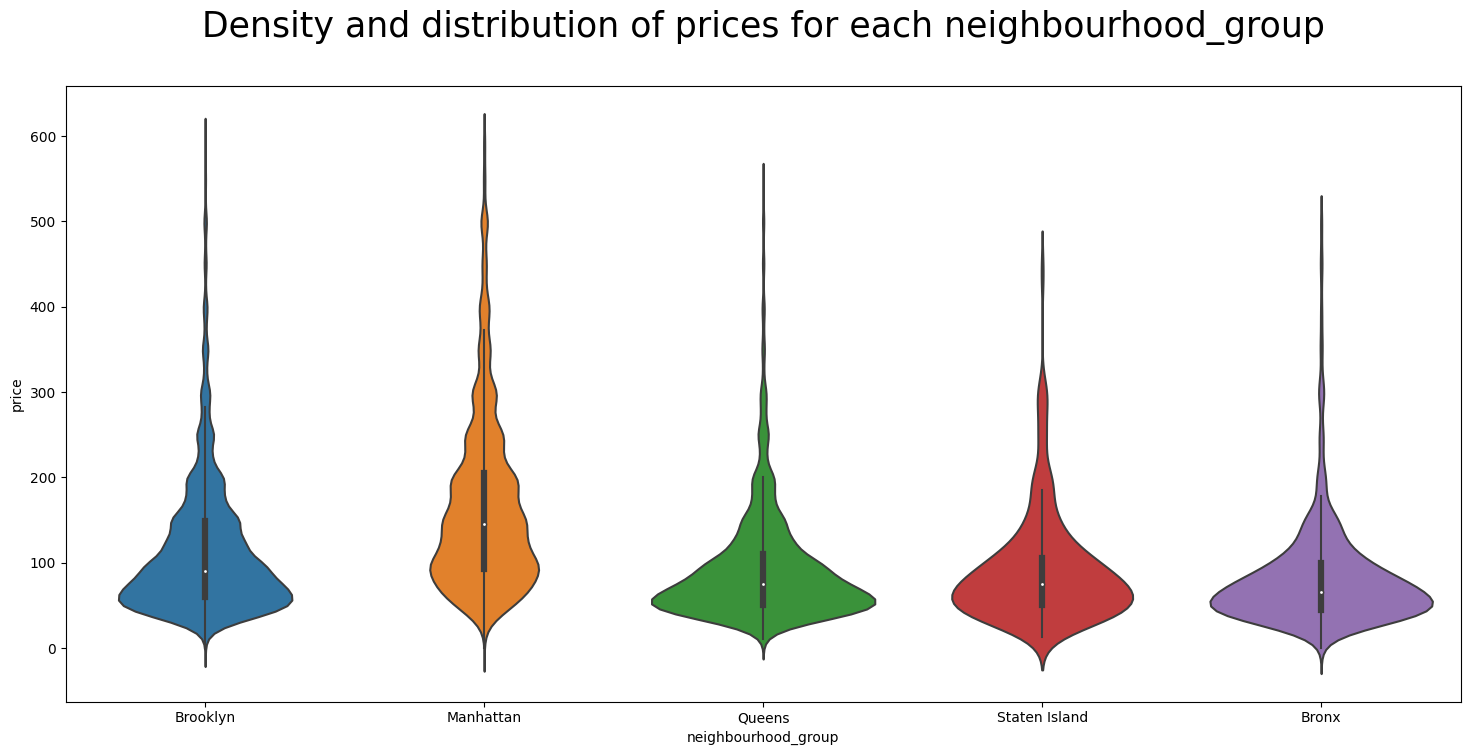

In [17]:
#distribution of price
dist_price=df[df["price"]<600]
plt.figure(figsize=(18,8))
viz_plt=sns.violinplot(x="neighbourhood_group",y="price",data=dist_price)
viz_plt.set_title("Density and distribution of prices for each neighbourhood_group\n",size=25)

In [18]:
top_host=df["host_id"].value_counts().sort_values(ascending=False).head(10)
top_host=pd.DataFrame(top_host)
top_host.reset_index(inplace=True)
top_host.rename(columns={"index":"Host_ID","host_id":"P_Count"},inplace=True)
top_host

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0.0, '0'),
 Text(0, 50.0, '50'),
 Text(0, 100.0, '100'),
 Text(0, 150.0, '150'),
 Text(0, 200.0, '200'),
 Text(0, 250.0, '250'),
 Text(0, 300.0, '300'),
 Text(0, 350.0, '350')]

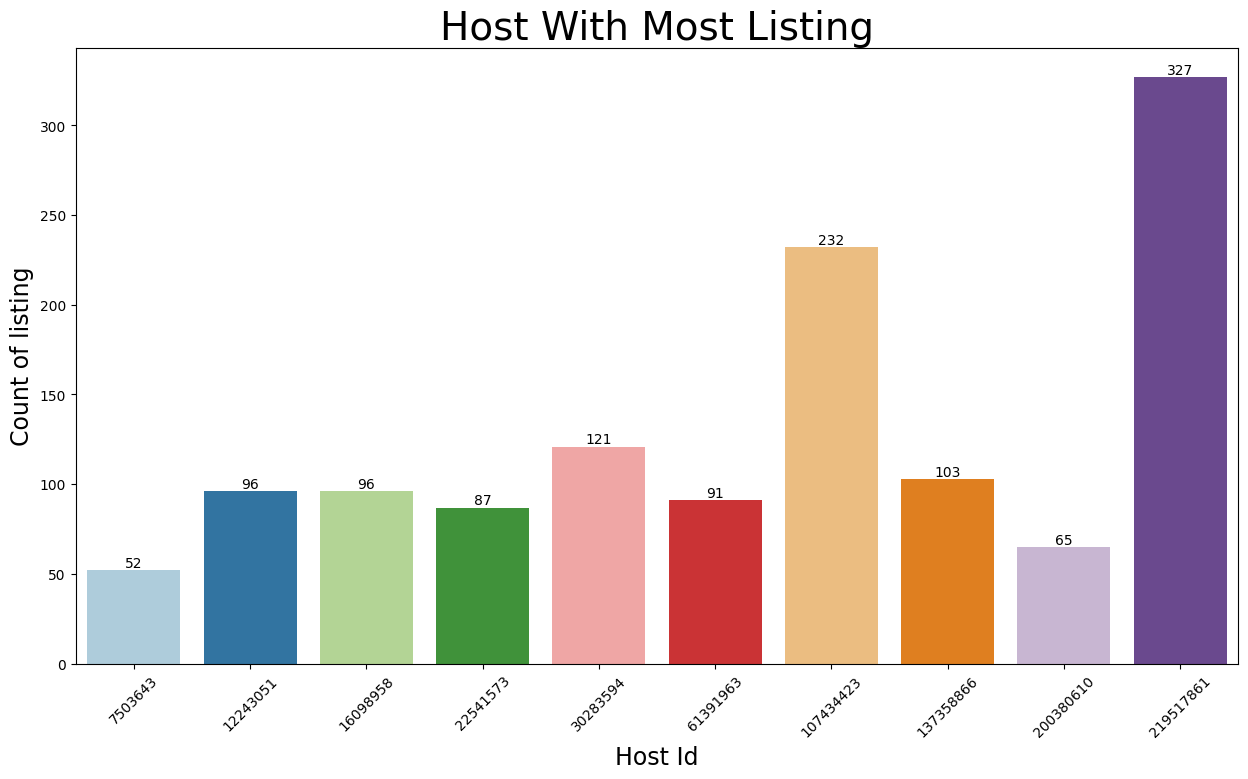

In [19]:
plt.figure(figsize=(15,8))
bar=sns.barplot(x="Host_ID",y="P_Count",data=top_host,palette="Paired")
for label in bar.containers:
    bar.bar_label(label)
bar.set_title("Host With Most Listing",size=28)
bar.set_ylabel("Count of listing",size=17)
bar.set_xlabel("Host Id",size=17)
bar.set_xticklabels(bar.get_xticklabels(),rotation=45)
bar.set_yticklabels(bar.get_yticklabels())

Text(0.5, 1.0, 'Neighbourhood Group\n')

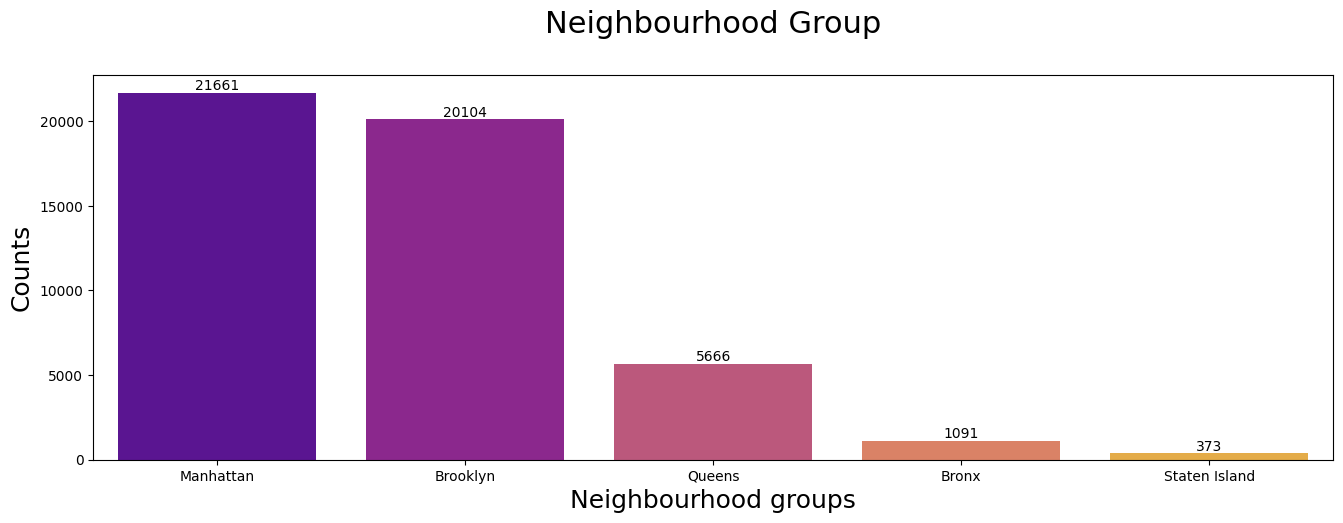

In [20]:
ax=sns.countplot(x="neighbourhood_group",data=df,palette="plasma",order=df["neighbourhood_group"].value_counts(ascending=False).index)
for label in ax.containers:
    ax.bar_label(label)
fig = plt.gcf()
fig.set_size_inches(16,5)
plt.xlabel('Neighbourhood groups',size=18)
plt.ylabel('Counts',size=18)
plt.title('Neighbourhood Group\n',size=22)

Text(0.5, 1.0, 'Room availability with respect to neighbourhood groups\n')

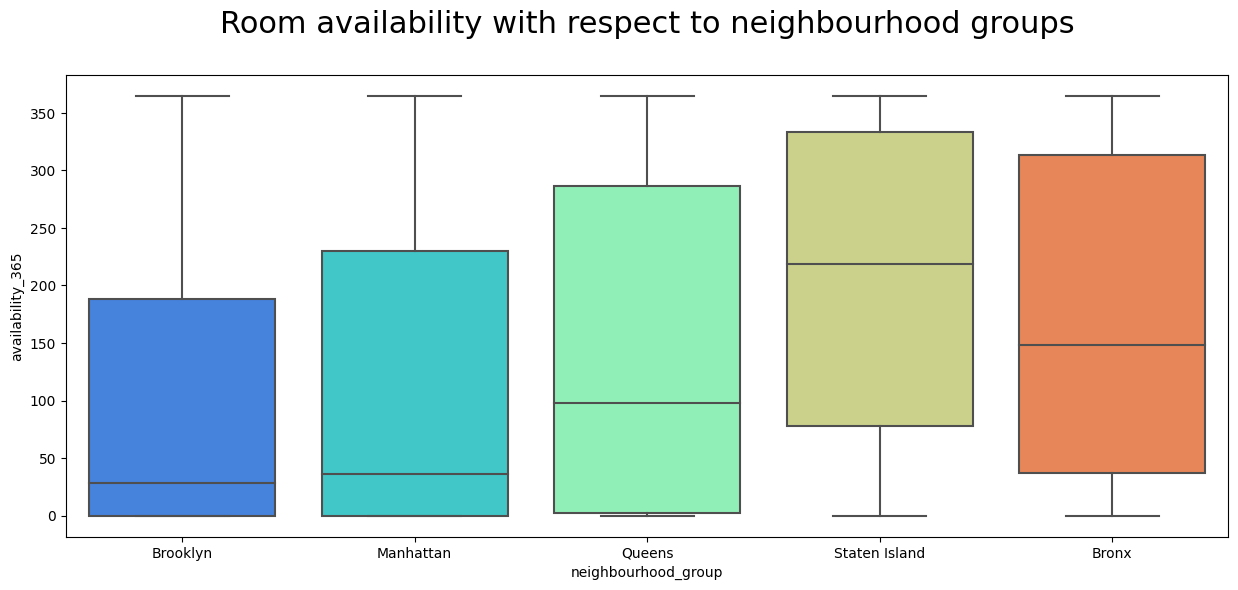

In [21]:
plt.figure(figsize=(15,6))
sns.boxplot(x="neighbourhood_group",y="availability_365",data=df,palette="rainbow")
plt.title("Room availability with respect to neighbourhood groups\n",size=22)

Text(0.5, 1.0, 'Mininmum night stays in AirBNB hotels')

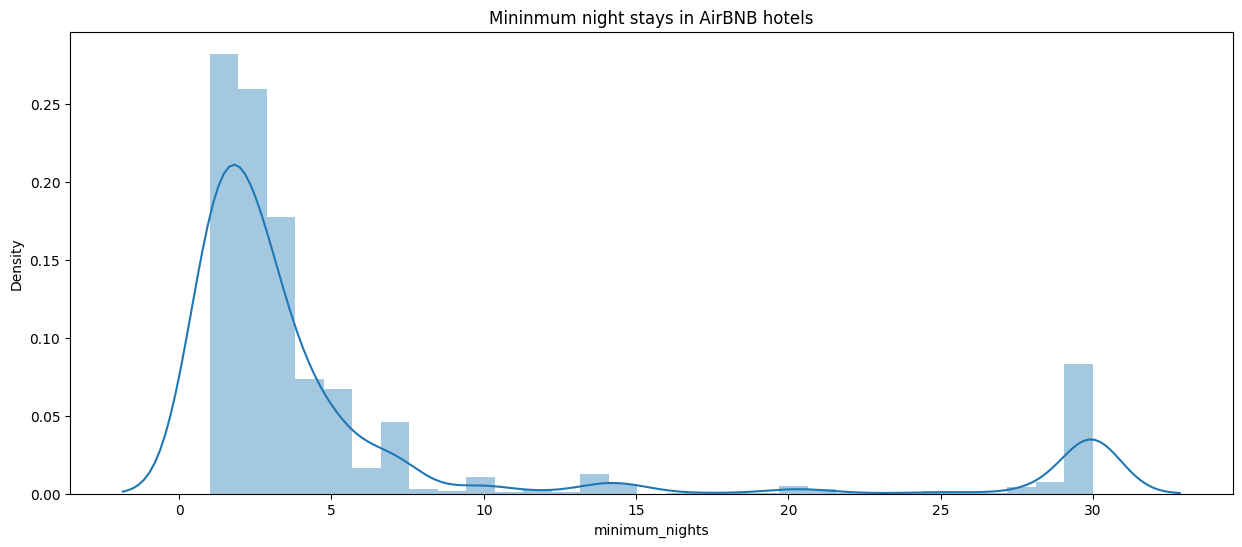

In [22]:
plt.figure(figsize=(15,6))
sns.distplot(df[(df["minimum_nights"]>0) & (df["minimum_nights"]<=30)]["minimum_nights"],bins=31)
#plt.ioff()
plt.title("Mininmum night stays in AirBNB hotels")

Text(0.5, 1.0, 'Map of neighbourhood groups\n')

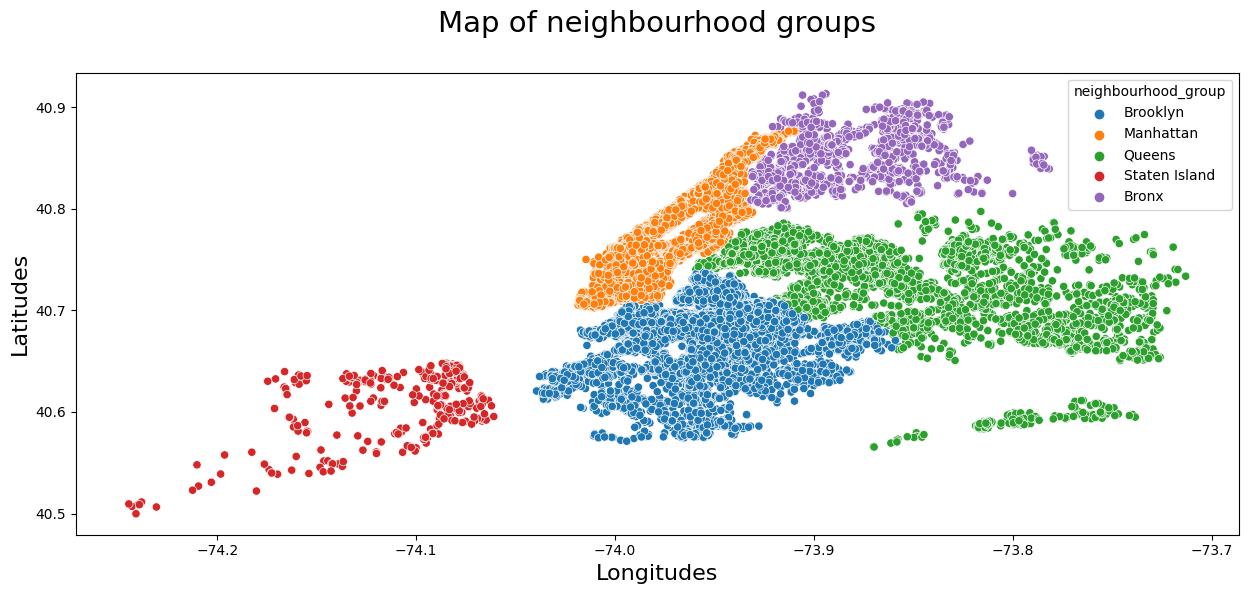

In [23]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df["longitude"],y=df["latitude"],hue=df["neighbourhood_group"])
#plt.ioff()
plt.xlabel('Longitudes',size=16)
plt.ylabel('Latitudes',size=16)
plt.title("Map of neighbourhood groups\n",size=21)

Text(0, 0.5, '')

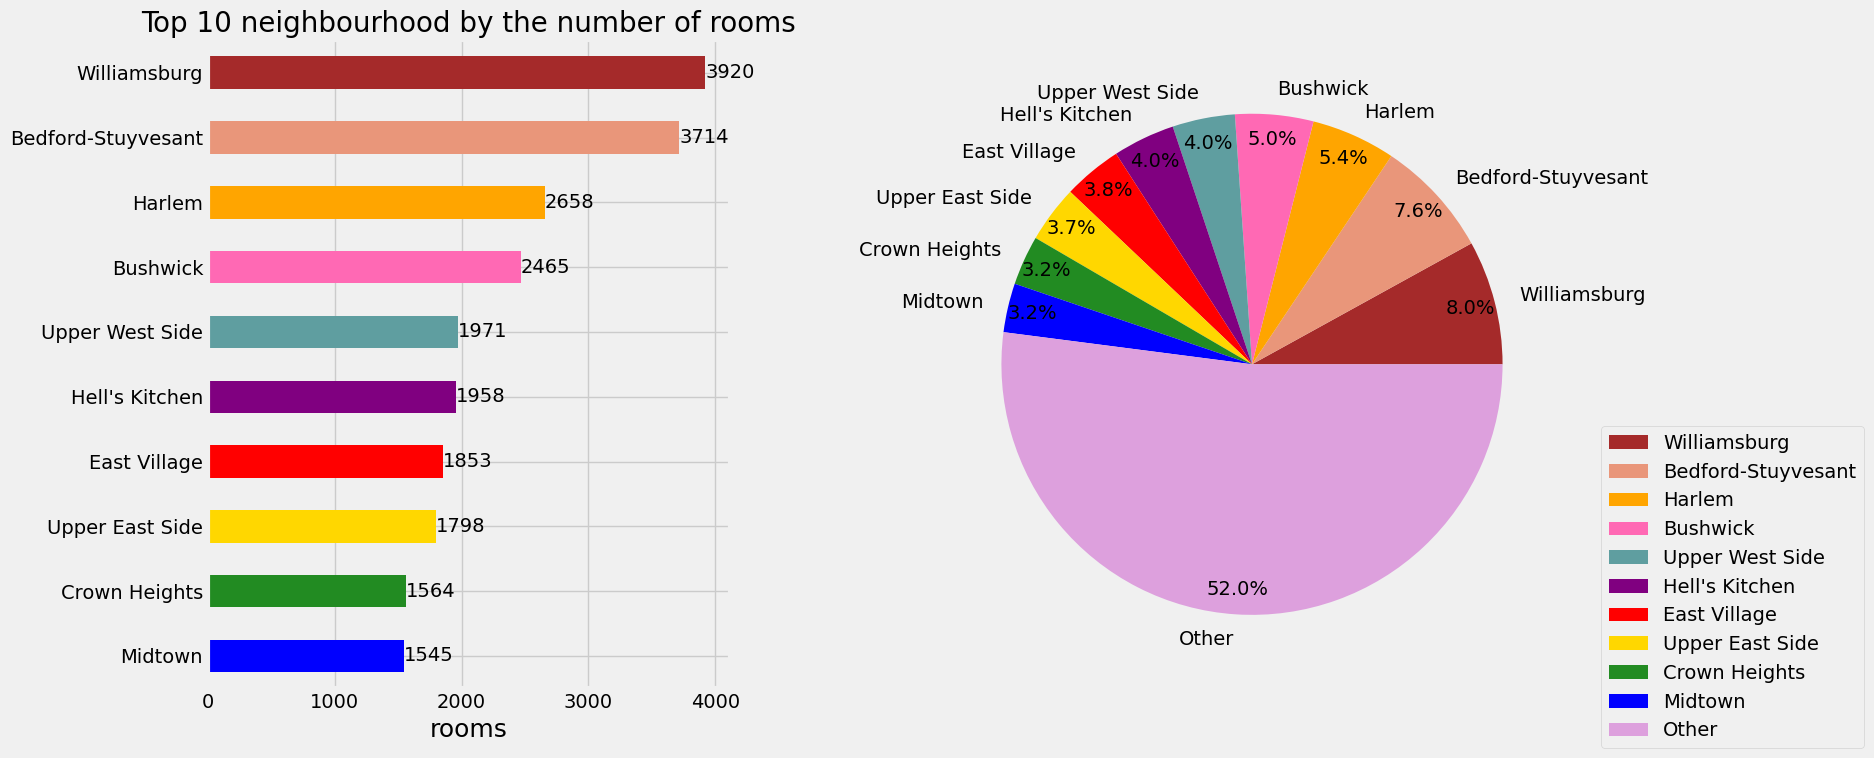

In [24]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
df.neighbourhood.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 neighbourhood by the number of rooms",size=20)
ax[0].set_xlabel('rooms',size=18)
for label in ax[0].containers:
    ax[0].bar_label(label)


count=df['neighbourhood'].value_counts()
groups=list(df['neighbourhood'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4))
plt.subplots_adjust(wspace =0.5, hspace =0)

plt.ylabel('')


Text(0.5, 1.0, 'Map of neighbourhood groups\n')

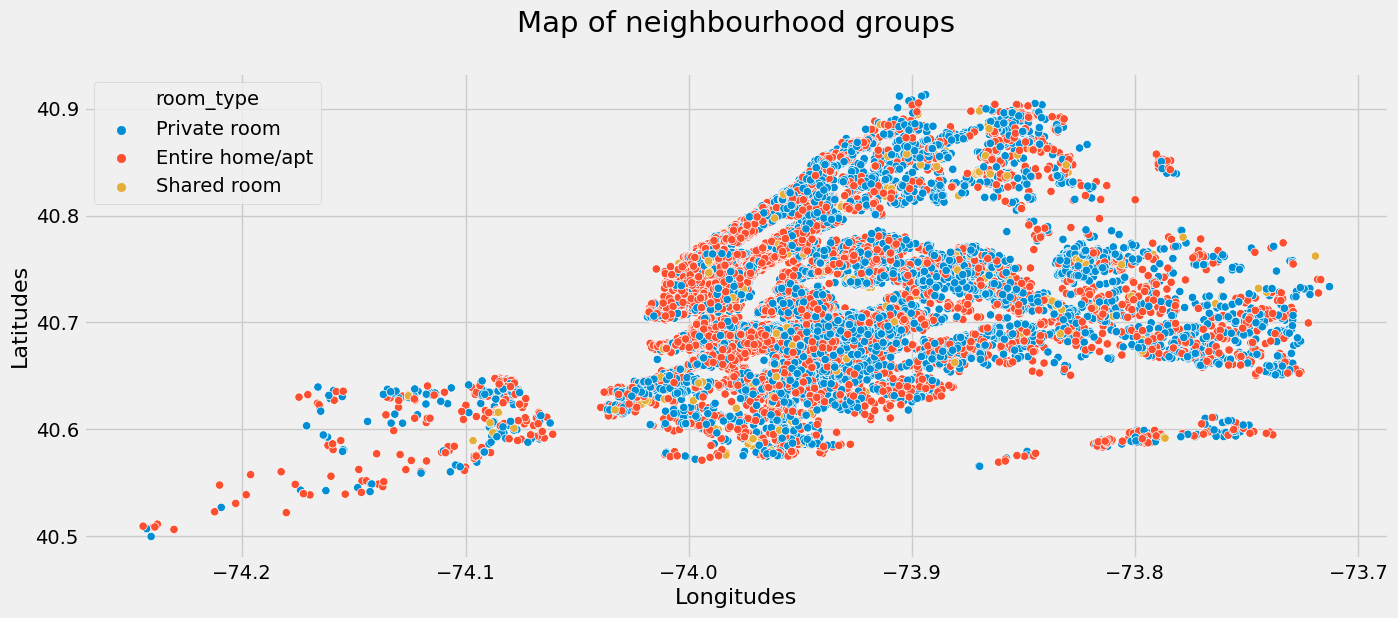

In [25]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df["longitude"],y=df["latitude"],hue=df["room_type"])
#plt.ioff()
plt.xlabel('Longitudes',size=16)
plt.ylabel('Latitudes',size=16)
plt.title("Map of neighbourhood groups\n",size=21)

In [26]:
sub_7=airbnb.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
sub_7.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0


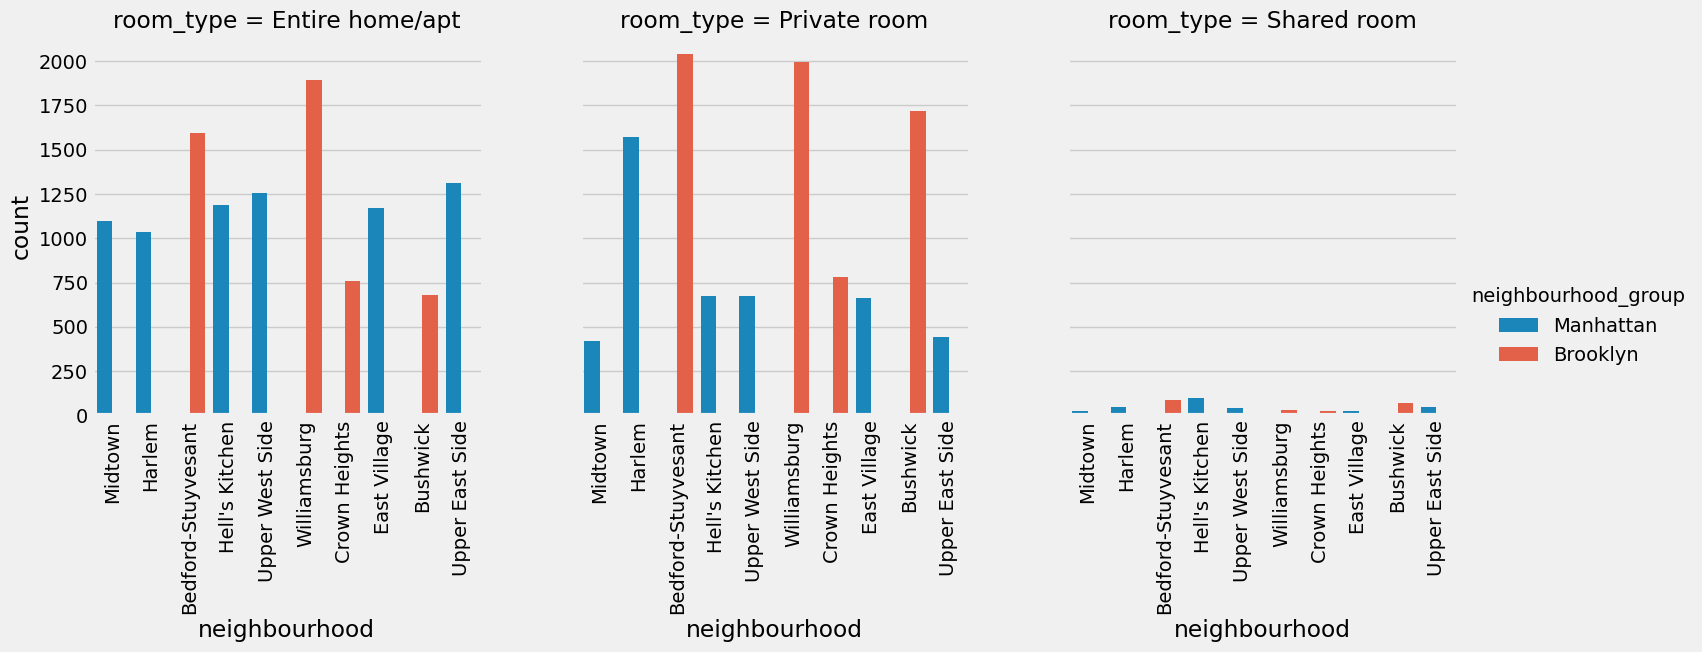

In [30]:
sub_plot=sns.catplot(x="neighbourhood",hue="neighbourhood_group",col="room_type",data=sub_7,kind="count")
sub_plot.set_xticklabels(rotation=90)

In [31]:
from wordcloud import WordCloud

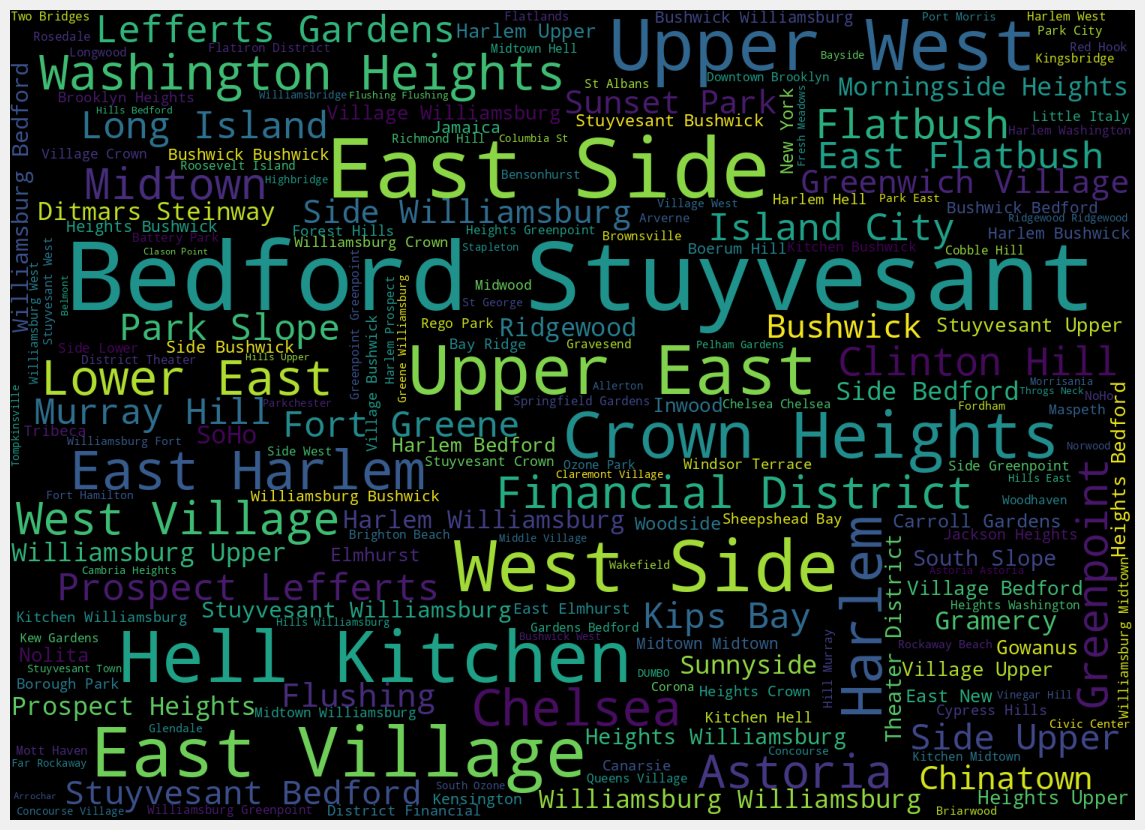

In [32]:
plt.subplots(figsize=(25,10))
wordcloud = WordCloud(
                          background_color='black',
                          width=1500,
                          height=1080
                         ).generate(" ".join(airbnb.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()